<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-exploration-/-preprocessing" data-toc-modified-id="Data-exploration-/-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration / preprocessing</a></span><ul class="toc-item"><li><span><a href="#Shrink-the-data" data-toc-modified-id="Shrink-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Shrink the data</a></span></li><li><span><a href="#Filter-the-data-and-reassign-IDs" data-toc-modified-id="Filter-the-data-and-reassign-IDs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Filter the data and reassign IDs</a></span></li><li><span><a href="#Train-/-test-split" data-toc-modified-id="Train-/-test-split-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Train / test split</a></span></li><li><span><a href="#Create-mappings" data-toc-modified-id="Create-mappings-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Create mappings</a></span></li><li><span><a href="#Pre-compute-user-and-movie-statistics" data-toc-modified-id="Pre-compute-user-and-movie-statistics-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Pre-compute user and movie statistics</a></span></li></ul></li><li><span><a href="#Save-to-file" data-toc-modified-id="Save-to-file-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save to file</a></span></li></ul></div>

<h1 align="center">Movielens - Data Preprocessing</h1>

This notebook contains the code to preprocess the original Movielens dataset. We filter out a subset of the data and convert them to efficient, handy Python data structures which will be used in our further analysis. Finally, we save these preprocessed data in our file system to be used later for analysing recommendation algorithms.<br><br>
Dataset - https://www.kaggle.com/grouplens/movielens-20m-dataset<br>

## Imports

In [1]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load the data

In [2]:
df=pd.read_csv("./data/rating.csv")
df.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
## We drop the timestamp column , since we don't need it.
df.drop(labels='timestamp',axis=1,inplace=True)

## Data exploration / preprocessing

Number of unique users: 138493
Number of unique movies: 26744
Total ratings in the dataset: 20000263
User-Movie matrix size: 3703856792
User-Movie matrix empty percentage: 99.46001521864456


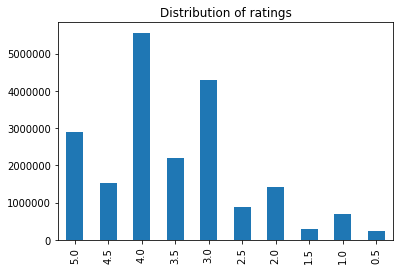

In [4]:
n_users=df['userId'].nunique()
n_movies=df['movieId'].nunique()
matrix_size=n_users*n_movies
n_ratings=df.shape[0]

print("Number of unique users:",n_users)
print("Number of unique movies:",n_movies)
print("Total ratings in the dataset:",n_ratings)

print("User-Movie matrix size:",matrix_size)
print("User-Movie matrix empty percentage:",(matrix_size-n_ratings)*100/(matrix_size))

ratings=df['rating'].value_counts().sort_index(ascending=False)
rating_dist=ratings.plot.bar(title="Distribution of ratings")

### Shrink the data
Since the number of users and movies are quite large, we only consider a subset of the original data. Below, we find the top users (the users who have rated the most movies) and the top movies (the movies that have the most ratings).

In [5]:
n_top_users=300
n_top_movies=800

users_counter=Counter(df['userId'])
movies_counter=Counter(df['movieId'])

top_users=users_counter.most_common(n_top_users)
top_movies=movies_counter.most_common(n_top_movies)

top_user_ids=[user_id for user_id,count in top_users ]
top_movie_ids=[movie_id for movie_id,count in top_movies ]

print("Top 5 users ids and their counts:",top_users[:5])
print("Top 5 movies ids and their counts:",top_movies[:5])

Top 5 users ids and their counts: [(118205, 9254), (8405, 7515), (82418, 5646), (121535, 5520), (125794, 5491)]
Top 5 movies ids and their counts: [(296, 67310), (356, 66172), (318, 63366), (593, 63299), (480, 59715)]


### Filter the data and reassign IDs
Filter out the rows that have top users and top movies<br>
Replace old user ids and movie ids with new ids ranging to 0 to their respective lengths.

In [6]:
userid_map_old_to_new=dict([(old,new) for new,old in enumerate(top_user_ids)])
userid_map_new_to_old=dict([(new,old) for new,old in enumerate(top_user_ids)])
movieid_map_old_to_new=dict([(old,new) for new,old in enumerate(top_movie_ids)])
movieid_map_new_to_old=dict([(new,old) for new,old in enumerate(top_movie_ids)])

In [7]:
## Filter out the rows that have top users and top movies
df= df.loc[ df['userId'].isin(userid_map_old_to_new) & df['movieId'].isin(movieid_map_old_to_new) ]

In [8]:
## Replace old_ids with new_ids
df['userId']=df['userId'].apply(lambda x: userid_map_old_to_new[x])
df['movieId']=df['movieId'].apply(lambda x: movieid_map_old_to_new[x])

Number of unique users: 300
Number of unique movies: 800
Total ratings in the dataset: 179576
User-Movie matrix size: 240000
User-Movie matrix empty percentage: 25.176666666666666


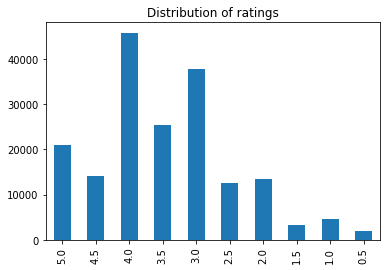

In [9]:
n_users=df['userId'].nunique()
n_movies=df['movieId'].nunique()
matrix_size=n_users*n_movies
n_ratings=df.shape[0]

print("Number of unique users:",n_users)
print("Number of unique movies:",n_movies)
print("Total ratings in the dataset:",n_ratings)

print("User-Movie matrix size:",matrix_size)
print("User-Movie matrix empty percentage:",(matrix_size-n_ratings)*100/(matrix_size))

ratings=df['rating'].value_counts().sort_index(ascending=False)
rating_dist=ratings.plot.bar(title="Distribution of ratings")

### Train / test split
The train and test dataset should be set up such that for every user and movie in test there should be atleast one rating in train.

In [ ]:
TEST_SIZE=0.2

In [10]:
## Split into train and test. Every user_id must be split proportionally
train_frames=[]
test_frames=[]
for user_id,frame in df.groupby(by='userId'):
    if frame.shape[0]<10: continue
    train, test = train_test_split(frame, test_size=TEST_SIZE)
    train_frames.append(pd.DataFrame(train))
    test_frames.append(pd.DataFrame(test))
    
train=pd.concat(train_frames)
test=pd.concat(test_frames)

### Create mappings

In [11]:
user_to_movie_map={}  ## Key:= User_id, Value:= [list of movies]
movie_to_user_map={}  ## Key:= Movie_id, Value:=[list of users]
train_ratings={}      ## Key:= (User_id,Movie_id). Value:=Rating
test_ratings={}       ## Key:= (User_id,Movie_id). Value:=Rating

def update_train_maps(row):
    user=row.userId
    movie=row.movieId

    if user not in user_to_movie_map: 
        user_to_movie_map[user]=set()
        
    user_to_movie_map[user].add(movie)
    
    if movie not in movie_to_user_map: 
        movie_to_user_map[movie]=set()
        
    movie_to_user_map[movie].add(user)
    
    train_ratings[(user,movie)]=row.rating

def update_test_maps(row):
    user=row.userId
    movie=row.movieId
    test_ratings[(user,movie)]=row.rating
    
_=train.apply(lambda row: update_train_maps(row),axis=1)
_=test.apply(lambda row: update_test_maps(row),axis=1)

### Pre-compute user and movie statistics

In [12]:
## Key:=User_id, Values:=(Avg_rating, Norm_of_deviations) - Used in Collaborative Filtering
user_statistics={}
for user in range(n_top_users):
    items=user_to_movie_map[user]
    ratings=np.array([train_ratings[(user,m)] for m in items])
    mean=np.mean(ratings)
    norm=np.linalg.norm(ratings-mean)
    user_statistics[user]=(mean,norm)

## Key:=Movie_id, Values:=(Avg_rating, Norm_of_deviations) - Used in Collaborative Filtering
movie_statistics={}
for movie in range(n_top_movies):
    users=movie_to_user_map[movie]
    ratings=np.array([train_ratings[(u,movie)] for u in users])
    mean=np.mean(ratings)
    norm=np.linalg.norm(ratings-mean)
    movie_statistics[movie]=(mean,norm)

In [13]:
print("Length of user_to_movie_map:",len(user_to_movie_map))
print("Length of movie_to_user_map:",len(movie_to_user_map))
print("Length of ratings_train:",len(train_ratings))
print("Length of ratings_test:",len(test_ratings))
print("Length of user_statistics:",len(train_ratings))
print("Length of movie_statistics:",len(test_ratings))

Length of user_to_movie_map: 300
Length of movie_to_user_map: 800
Length of ratings_train: 143542
Length of ratings_test: 36034
Length of user_statistics: 143542
Length of movie_statistics: 36034


## Save to file

In [14]:
with open('./data/user_to_movie_map.pkl', 'wb') as fp:
    pickle.dump(user_to_movie_map, fp)

with open('./data/movie_to_user_map.pkl', 'wb') as fp:
    pickle.dump(movie_to_user_map, fp)

with open('./data/train_ratings.pkl', 'wb') as fp:
    pickle.dump(train_ratings, fp)

with open('./data/test_ratings.pkl', 'wb') as fp:
    pickle.dump(test_ratings, fp)

with open('./data/user_statistics.pkl', 'wb') as fp:
    pickle.dump(user_statistics, fp)
    
with open('./data/movie_statistics.pkl', 'wb') as fp:
    pickle.dump(movie_statistics, fp)